In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("hw7_cars.csv")
df.isna().sum()

Price         0
miles(000)    0
age           0
miles         0
year          0
model         0
dtype: int64

In [3]:
df = df.drop(columns=['miles(000)'])

In [11]:
#luu category model
model_categories = df['model'].astype('category').cat.categories
#doi thanh dang so
df['model'] = df['model'].astype('category').cat.codes
df.head()

,Price,age,miles,year,model
0,15500,4,24000,2013,2
1,14000,3,4800,2014,2
2,13999,4,77254,2013,2
3,10900,9,40000,2008,2
4,10500,5,75853,2012,1


## Câu 1

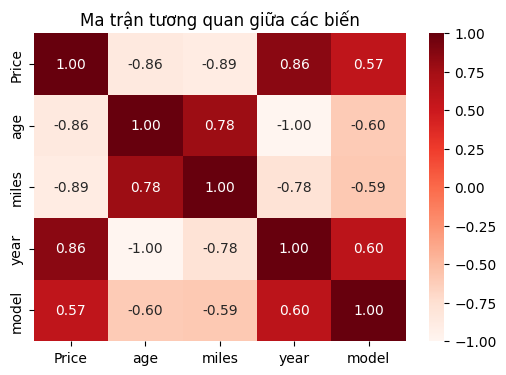

In [13]:
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.Reds, fmt=".2f")
plt.title("Ma trận tương quan giữa các biến")
plt.show()

- Biến phù hợp: year, miles, age, model

## Câu 2

In [15]:
model = LinearRegression()
X=df.drop(columns="Price")
y = df["Price"]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [26]:
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## Câu 3

In [27]:
y_pred = model.predict(X_test)

In [28]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'mse: {mse:.4f}')
print(f'r2: {r2:.4f}')

comparison = pd.DataFrame({"Thực tế:": y_test, "Dự đoán": y_pred})
print(comparison.head())

mse: 2336848.0758
r2: 0.8628
    Thực tế:       Dự đoán
43      5250   4725.857414
1      14000  16857.850673
24     12000  15822.428159
38     15700  16429.036754
8       8500   8414.623492
